<a href="https://colab.research.google.com/github/JayEpic/Pneumonia_CNN/blob/main/XRAY_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

import cv2
import os

In [5]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [6]:
train = get_training_data('/content/drive/MyDrive/Datasets/chest_Xray/train')
test = get_training_data('/content/drive/MyDrive/Datasets/chest_Xray/test')
val = get_training_data('/content/drive/MyDrive/Datasets/chest_Xray/val')

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<Axes: xlabel='count'>

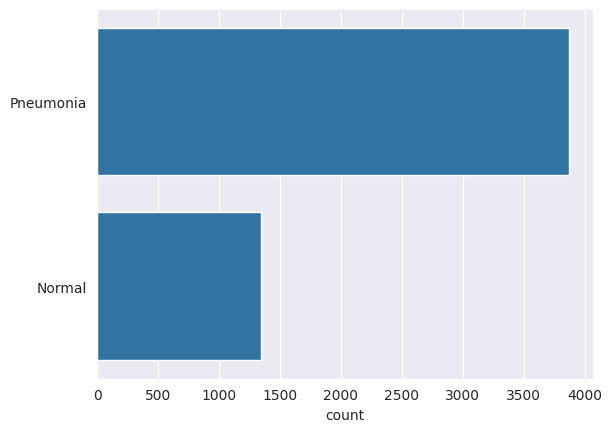

In [7]:
l = []
for i in train:
  if(i[1] == 0):
    l.append("Pneumonia")
  else:
    l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'NORMAL')

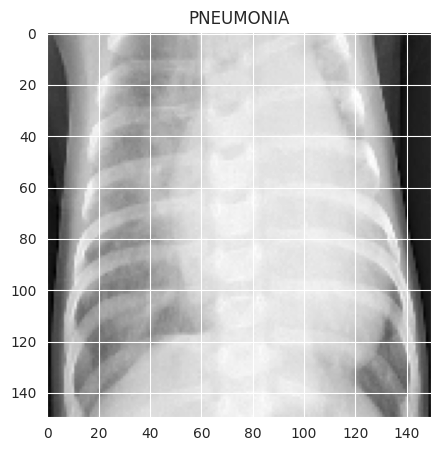

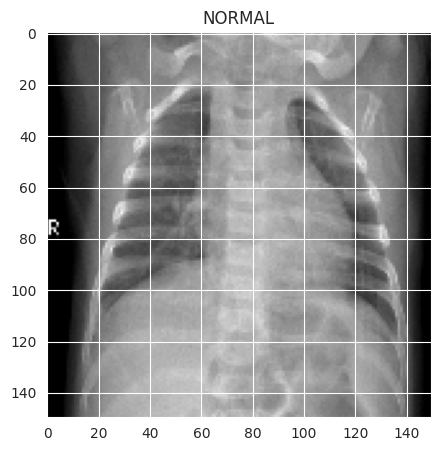

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [9]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in train:
  x_test.append(feature)
  y_test.append(label)

for feature, label in train:
  x_val.append(feature)
  y_val.append(label)

In [10]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [11]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [12]:
datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False,zca_whitening=False, rotation_range=30,zoom_range=0.2,height_shift_range=0.1, horizontal_flip=True, vertical_flip=False)

datagen.fit(x_train)


In [13]:
model = Sequential()

model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (150, 150, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128, (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(Conv2D(256, (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 150, 150, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 75, 75, 64)        2

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patince = 2, verbose = 1, factor = 0.3, min_lr = 0.000001)

In [15]:
history = model.fit(datagen.flow(x_train, y_train, batch_size = 32), epochs = 10, validation_data = datagen.flow(x_val, y_val), callbacks = [learning_rate_reduction])

Epoch 1/10
163/163 [==============================] - 532s 3s/step - loss: 0.4657 - accuracy: 0.8462 - val_loss: 10.2554 - val_accuracy: 0.7429 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - 492s 3s/step - loss: 0.2511 - accuracy: 0.9061 - val_loss: 18.5662 - val_accuracy: 0.7429 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - 526s 3s/step - loss: 0.1913 - accuracy: 0.9329 - val_loss: 13.8263 - val_accuracy: 0.7442 - lr: 0.0010
Epoch 4/10
163/163 [==============================] - 495s 3s/step - loss: 0.1738 - accuracy: 0.9375 - val_loss: 0.4543 - val_accuracy: 0.9003 - lr: 0.0010
Epoch 5/10
163/163 [==============================] - 529s 3s/step - loss: 0.1675 - accuracy: 0.9448 - val_loss: 0.1586 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 6/10
163/163 [==============================] - 495s 3s/step - loss: 0.1487 - accuracy: 0.9525 - val_loss: 0.5212 - val_accuracy: 0.8679 - lr: 0.0010
Epoch 7/10
163/163 [==============================] - 494s 3s

In [16]:
print("Loss of the model is - ", model.evaluate(x_test, y_test)[0])
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1]*100, "%")

163/163 [==============================] - 99s 610ms/step - loss: 0.4441 - accuracy: 0.7793
Loss of the model is -  0.4441404640674591
163/163 [==============================] - 100s 611ms/step - loss: 0.4441 - accuracy: 0.7793
Accuracy of the model is -  77.93328166007996 %


In [ ]:
epochs = [i for i in range(10)]
fig, ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['train_acc']
test_loss = history.history['train_loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, test_acc, 'bo-', label = 'Testing Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'g-o', label = 'Training Loss')
ax[1].plot(epochs, test_loss, 'b-o', label = 'Testing Loss')
ax[1].plot(epochs, val_loss, 'r-o', label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")

plt.show()

In [ ]:
predictions = model.predict(x_test)
predictions = predictions.reshape(1, -1)[0]
predictions[:15]

In [ ]:
print(classification_report(y_test, predictions, target_names = ['(Pneumonia Class 0)', 'Normal (Class 1)']))